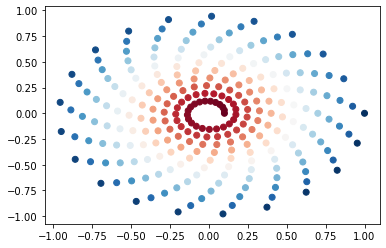

In [63]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

n = 256
angle = np.linspace(0,12*2*np.pi, n)
radius = np.linspace(.1,1,n)

x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.scatter(x,y,c= angle, cmap = cm.RdBu)
plt.show()

# Relu

In [64]:
##RelU
X=x
Y=y
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def RelU(self, x, der=False):
        if der == True:
            return 1- x**2
        else:
            return list(map(lambda a: a if a>=0 else 0, x))
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.RelU(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.RelU(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.RelU(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.RelU(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [65]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.RelU(X,Y, False)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

TypeError: RelU() takes from 2 to 3 positional arguments but 4 were given